# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_split = 23 y n_repeats = 7.

<AxesSubplot:xlabel='Year'>

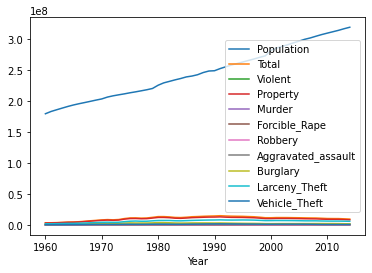

In [1]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [9]:
dt= df.drop(columns="Population")
dt

,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


In [12]:
dt.reset_index("Year", inplace=True)
dt

,Year,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


<AxesSubplot:>

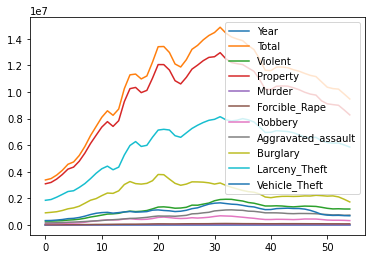

In [13]:

dt.plot()

In [ ]:
dt= dt.drop(columns="Total")

<AxesSubplot:>

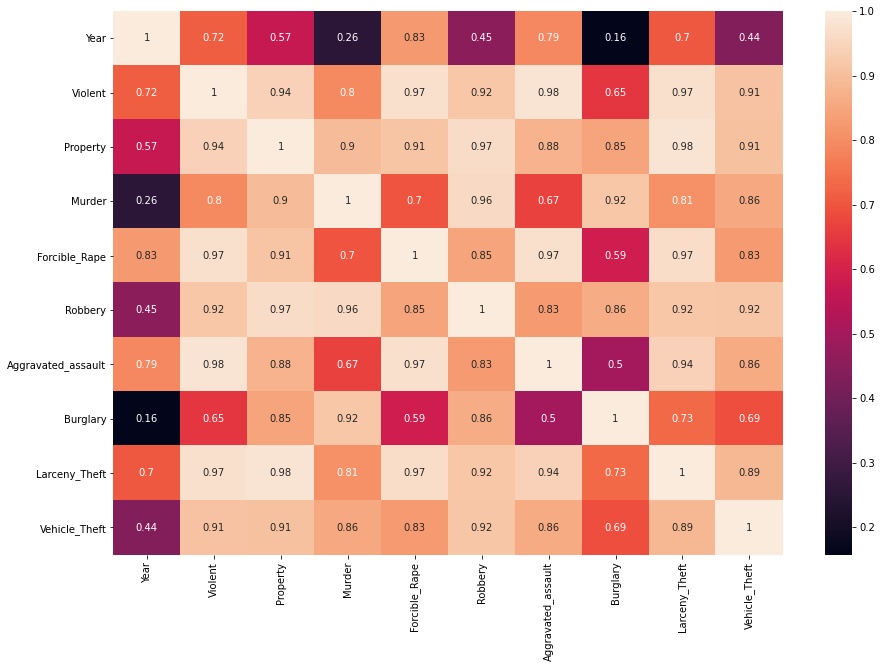

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(), annot=True)

5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_split = 23 y n_repeats = 7.

In [23]:
dt.corr()["Murder"].sort_values(ascending= False)

Murder                1.000000
Robbery               0.960156
Burglary              0.920207
Property              0.895641
Vehicle_Theft         0.856600
Larceny_Theft         0.806279
Violent               0.795300
Forcible_Rape         0.699655
Aggravated_assault    0.668511
Year                  0.256010
Name: Murder, dtype: float64

In [24]:
X = dt[["Robbery", "Burglary", "Property", "Vehicle_Theft", "Larceny_Theft"]]
X.shape

(55, 5)

In [25]:
y= dt["Murder"]
y

0      9110
1      8740
2      8530
3      8640
4      9360
5      9960
6     11040
7     12240
8     13800
9     14760
10    16000
11    17780
12    18670
13    19640
14    20710
15    20510
16    18780
17    19120
18    19560
19    21460
20    23040
21    22520
22    21010
23    19310
24    18690
25    18980
26    20613
27    20096
28    20680
29    21500
30    23440
31    24700
32    23760
33    24530
34    23330
35    21610
36    19650
37    18208
38    16914
39    15522
40    15586
41    16037
42    16229
43    16528
44    16148
45    16740
46    17030
47    16929
48    16442
49    15399
50    14772
51    14661
52    14866
53    14319
54    14249
Name: Murder, dtype: int64

In [33]:
#Cross-validation CONTINUAR AQUI
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
polinominal_model = PolynomialFeatures(6) 
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [34]:

name='Polynomial'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(polinominal_model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[nan nan nan nan nan nan nan nan nan nan]
Polynomial: nan (nan)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Paso nº1
#Llamamos al polinomio, llamando primero a fit_transform para que entrene al modelo y despues se llamara a la regresion lineal
#estamos sacando la secante y cada una de las pendientes  hasta el grado del polimonio 3
#dregree es el parámetro
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

#Paso Nº2 
#Llamamos a la regresión lineal entrenandola con la salida del fit_transform 

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))

## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_splits = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".